# Module 5 Homework

In this homework we'll put what we learned about Spark in practice.

For this homework we will be using the Yellow 2024-10 data from the official website:

In [2]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet

--2025-02-26 12:30:48--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.164.82.160, 3.164.82.40, 3.164.82.112, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.164.82.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64346071 (61M) [binary/octet-stream]
Saving to: ‘yellow_tripdata_2024-10.parquet’

yellow_tripdata_202 100%[===================>]  61,36M  8,06MB/s    in 9,5s    

2025-02-26 12:30:59 (6,43 MB/s) - ‘yellow_tripdata_2024-10.parquet’ saved [64346071/64346071]



## Question 1: Install Spark and PySpark

- Install Spark
- Run PySpark
- Create a local spark session
- Execute spark.version.

What's the output?



## Solution

### Step 1: Install Spark and PySpark

- Install Java

  Spark requires Java. You can install it using the following commands:

  On Ubuntu:

  ```
  sudo apt update
  sudo apt install openjdk-21-jdk

  ```
  
- Download Spark

  Download the latest version of Apache Spark from the [official website](https://spark.apache.org/downloads.html). Choose the package type "Pre-built for Apache Hadoop."

- Extract Spark:

  ```
  tar -xvf spark-<version>-bin-hadoop<version>.tgz

  ```

- Set Environment Variables
  Add the following lines to your ~/.bashrc or ~/.zshrc file:
  
  ```
  export SPARK_HOME=~/spark-<version>-bin-hadoop<version>
  export PATH=$PATH:$SPARK_HOME/bin
  export PYTHONPATH=$SPARK_HOME/python:$PYTHONPATH
  export PYSPARK_PYTHON=python3

  ```

- Install PySpark

  ```
  pip install pyspark

   ```

### Step 2: Run PySpark

```
pyspark
  
```

### Step 3: Create a Local Spark Session
    
In the PySpark shell, create a local Spark session:

```
from pyspark.sql import SparkSession
spark = SparkSession.builder \
.master("local") \
.appName("MyApp") \
.getOrCreate()
    
```

### Step 4: Execute spark.version
To check the version of Spark, run:

```
spark.version

```
    

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local") \
    .appName("Batch Processing") \
    .getOrCreate()

25/02/26 12:31:04 WARN Utils: Your hostname, dataeng-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.241.136 instead (on interface ens33)
25/02/26 12:31:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/26 12:31:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
spark.version

'3.5.4'

### Answer: 3.5.4

## Question 2: Yellow October 2024

Read the October 2024 Yellow into a Spark Dataframe.

Repartition the Dataframe to 4 partitions and save it to parquet.

What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB)? Select the answer which most closely matches.

- 6MB
- 25MB
- 75MB
- 100MB

## Solution

In [11]:
# Read the October 2024 Yellow Taxi Data into a Spark DataFrame

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("YellowTaxiOctober2024") \
    .getOrCreate()

# Read the Parquet file into a DataFrame
df = spark.read.parquet("file:///home/dataeng/projects/spark/yellow_tripdata_2024-10.parquet")

# Show the schema and some sample data
df.printSchema()
df.show(5)

25/02/26 12:31:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



25/02/26 12:31:22 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-10-01 00:30:44|  2024-10-01 00:48:26|              1|          3.0|         1|                 N|         162|         246|           1|       18.4|  1.0|    0.5|       1.

In [12]:
# Repartition the DataFrame into 4 partitions
df_repartitioned = df.repartition(4)


# Save the repartitioned DataFrame to Parquet
df_repartitioned.write.mode("overwrite").parquet("file:///home/dataeng/projects/spark/output_directory")

In [13]:
# Calculate the Average Size of the Parquet Files

import os

# Path to the output Parquet files
output_path = "/home/dataeng/projects/spark/output_directory"

# List all Parquet files in the output directory
parquet_files = [f for f in os.listdir(output_path) if f.endswith(".parquet")]

# Calculate the total size of all Parquet files
total_size = sum(os.path.getsize(os.path.join(output_path, f)) for f in parquet_files)

# Calculate the average size in MB
average_size_mb = (total_size / len(parquet_files)) / (1024 * 1024)

print(f"Average size of Parquet files: {average_size_mb:.2f} MB")

Average size of Parquet files: 23.78 MB


### Answer: 25 MB

## Question 3: Count records

How many taxi trips were there on the 15th of October?

Consider only trips that started on the 15th of October.

- 85,567
- 105,567
- 125,567
- 145,567

## Solution

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date

# Create a Spark session
spark = SparkSession.builder \
    .appName("YellowTaxiOctober2024") \
    .getOrCreate()

# Read the Parquet file into a DataFrame
df = spark.read.parquet("file:///home/dataeng/projects/spark/yellow_tripdata_2024-10.parquet")

# Filter trips that started on the 15th of October
df_filtered = df.filter(to_date(col("tpep_pickup_datetime")) == "2024-10-15")

# Count the number of trips
num_trips = df_filtered.count()

print(f"Number of taxi trips on the 15th of October: {num_trips}")

Number of taxi trips on the 15th of October: 128893


### Answer: 125,567

## Question 4: Longest trip

What is the length of the longest trip in the dataset in hours?

- 122
- 142
- 162
- 182

## Solution

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, unix_timestamp, expr, max

# Create a Spark session
spark = SparkSession.builder \
    .appName("LongestTripDuration") \
    .getOrCreate()

# Read the Parquet file into a DataFrame
df = spark.read.parquet("file:///home/dataeng/projects/spark/yellow_tripdata_2024-10.parquet")

# Calculate trip duration in seconds
df_with_duration = df.withColumn(
    "trip_duration_seconds",
    unix_timestamp(col("tpep_dropoff_datetime")) - unix_timestamp(col("tpep_pickup_datetime"))
)

# Convert duration to hours
df_with_duration = df_with_duration.withColumn(
    "trip_duration_hours",
    col("trip_duration_seconds") / 3600
)

# Find the maximum trip duration in hours
max_duration_hours = df_with_duration.select(max("trip_duration_hours")).collect()[0][0]

print(f"Length of the longest trip in hours: {max_duration_hours}")

25/02/26 12:32:18 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Length of the longest trip in hours: 162.61777777777777


### Answer: 162

## Question 5: User Interface

Spark’s User Interface which shows the application's dashboard runs on which local port?

- 80
- 443
- 4040
- 8080

## Solution

Spark’s User Interface (UI), which provides a dashboard for monitoring Spark applications, runs on port 4040 by default. This UI is accessible while a Spark application is running and provides useful information such as:

- Job progress
- Task execution details
- Storage and memory usage
- Executor and environment details

http://localhost:4040/jobs/

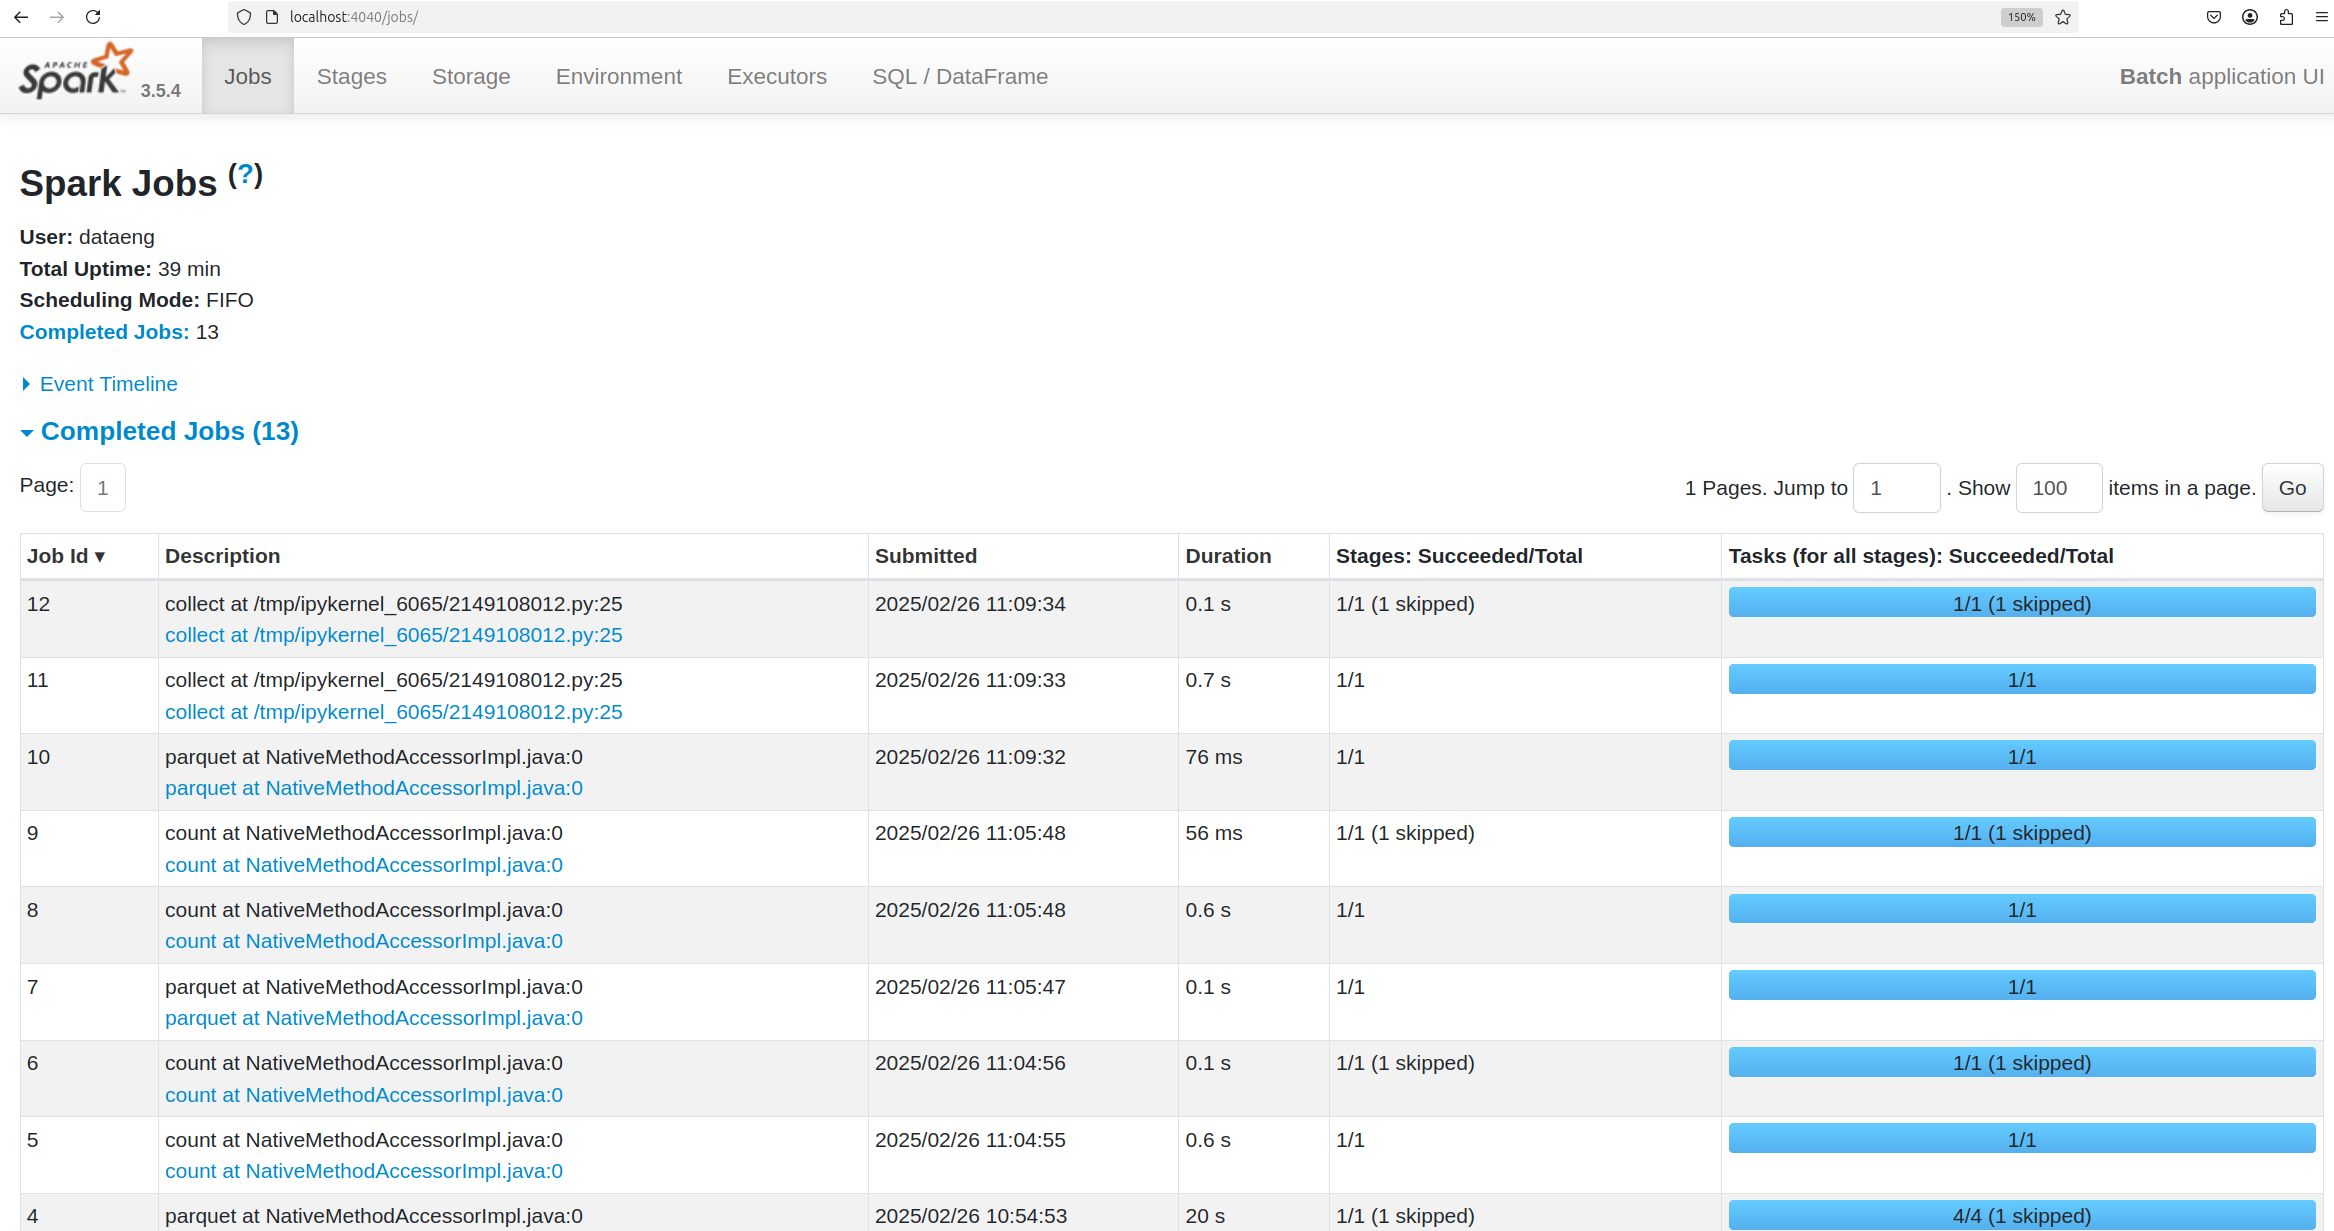

http://localhost:4040/environment/

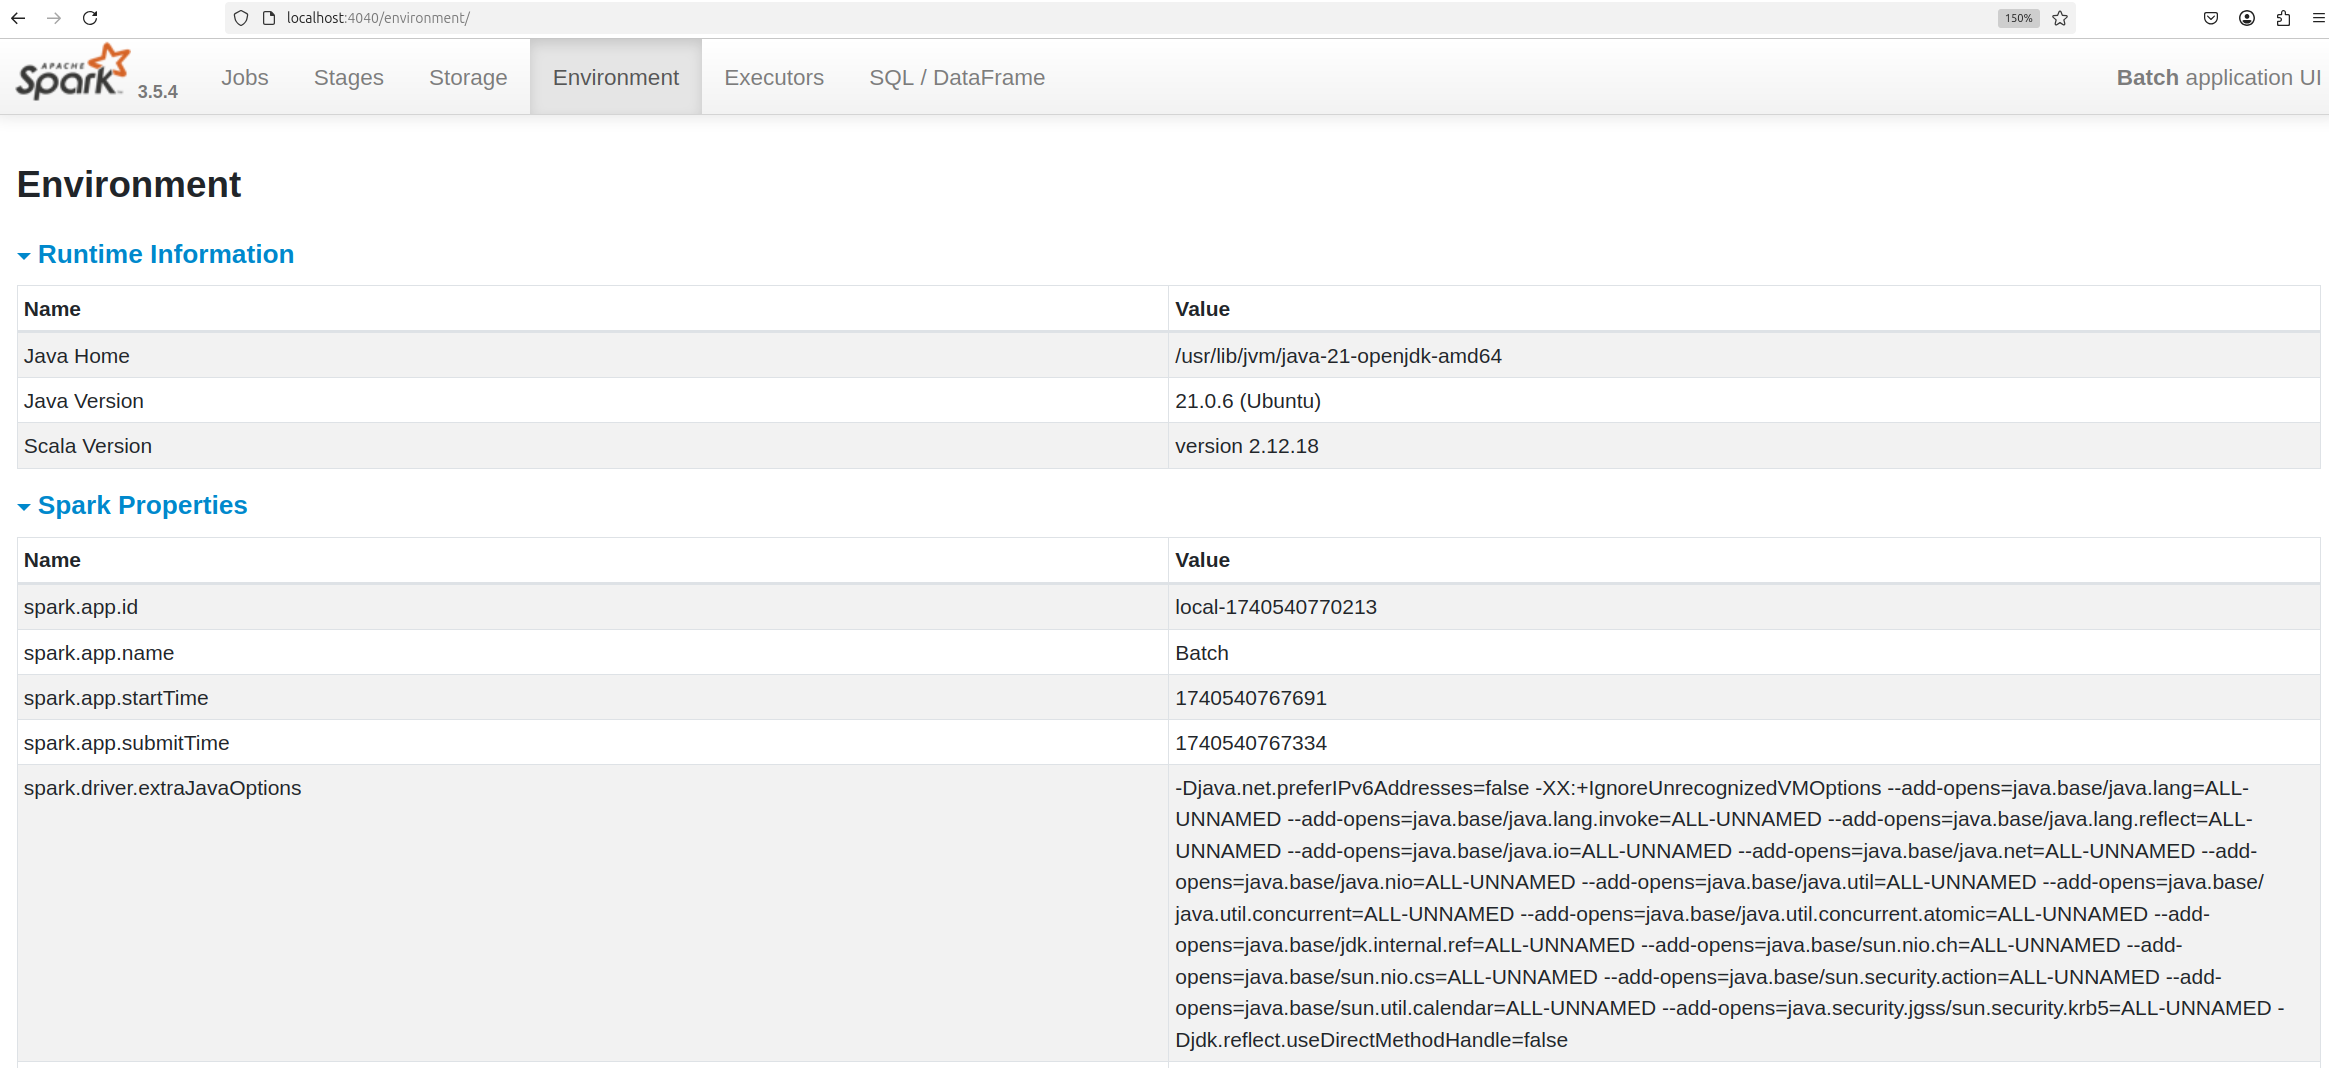

**Additional Notes:**
- Port 80: Typically used for HTTP traffic (e.g., web servers).
- Port 443: Typically used for HTTPS traffic (e.g., secure web servers).
- Port 8080: Commonly used for alternative HTTP traffic or application servers (e.g., Tomcat).

### Answer: 4040

## Question 6: Least frequent pickup location zone

Load the zone lookup data into a temp view in Spark:

wget https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv
Using the zone lookup data and the Yellow October 2024 data, what is the name of the LEAST frequent pickup location Zone?

- Governor's Island/Ellis Island/Liberty Island
- Arden Heights
- Rikers Island
- Jamaica Bay

## Solution

In [33]:
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

--2025-02-26 12:32:21--  https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.164.82.112, 3.164.82.197, 3.164.82.40, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.164.82.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12331 (12K) [text/csv]
Saving to: ‘taxi_zone_lookup.csv’

taxi_zone_lookup.cs 100%[===================>]  12,04K  --.-KB/s    in 0s      

2025-02-26 12:32:22 (381 MB/s) - ‘taxi_zone_lookup.csv’ saved [12331/12331]



In [34]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("LeastFrequentPickupZone") \
    .getOrCreate()

# Load the zone lookup data
zone_df = spark.read.option("header", True).csv("file:///home/dataeng/projects/spark/taxi_zone_lookup.csv")

# Load the Yellow October 2024 data
yellow_df = spark.read.parquet("file:///home/dataeng/projects/spark/yellow_tripdata_2024-10.parquet")

25/02/26 12:32:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [35]:
# Join the datasets on pickup location ID
joined_df = yellow_df.join(zone_df, yellow_df.PULocationID == zone_df.LocationID, "left")

In [36]:
from pyspark.sql.functions import col, count

# Count the frequency of each pickup zone
pickup_zone_counts = joined_df.groupBy("Zone").agg(count("*").alias("trip_count"))

In [37]:
# Find the least frequent pickup zone
least_frequent_zone = pickup_zone_counts.orderBy("trip_count").first()

print(f"Least frequent pickup location zone: {least_frequent_zone['Zone']}")

Least frequent pickup location zone: Governor's Island/Ellis Island/Liberty Island


### Answer: Governor's Island/Ellis Island/Liberty Island